# Homework #3

## Due Date: Tuesday, January 7, 23:59

### Part 1: Neuronal Spike Train Analysis Using Poisson Processes

   A neuroscientist is studying the firing patterns of a certain type of neuron in the brain. The average firing rate of these neurons is found to be 5 spikes per second. Assuming that the spike train of these neurons can be modeled as a Poisson process:

   a) What is the probability that the neuron fires exactly 10 times in a 2-second interval?

   b) Calculate the probability that the neuron fires at least once within a 0.1-second interval.

   c) What is the expected value of spikes for a 2 second interval?

a) Given Poisson distribution of spikes, probability of $n = 10$ spikes in $T = 2$ seconds given firing rate $r = 5$ is:
$$
P_2[x=10]=\frac{(rT)^n}{n!}e^{-rT} = \frac{(5\cdot 2)^{10}}{10!}e^{-5 \cdot 2} \sim 0.125 \sim 13\%
$$

b) Probability of neuron to fire at least once is:
$$P[x \geq 1] = 1 - P[x = 0]$$
Given Poisson distribution of spikes, rate $r = 5$ and period $T = 0.1$ :
$$P_{0.1}[x=0]=\frac{(rT)^n}{n!}e^{-rT} = \frac{(0.5)^0}{0!}e^{0.5} \sim 0.61 \quad \longrightarrow\quad P[x \geq 1] \sim 0.39
$$


с) For Poisson process expected value $\mathbb{E}[x]=rT$. Given $r = 5$ and $T =2$, $\mathbb{E}[x]=10$

In [144]:
import math
import numpy

n = 10
r = 5
T = 2

P = (math.pow(r*T, n) / math.factorial(n)) * numpy.exp(-r*T)
P

0.1251100357211333

In [147]:
import math
import numpy

n = 0
r = 5
T = 0.1

P = 1 - ((math.pow(r*T, n) / math.factorial(n)) * numpy.exp(-r*T))
P

0.3934693402873666

### Part 2: Programming a Poisson Process 

#### Notes:

- For all programming tasks, ensure that your code is well-commented to explain your logic and approach.
- Make sure to handle edge cases, such as negative values of $\lambda$ or $k$, appropriately in your functions.
- In Question 2, if you're unfamiliar with plotting libraries, focus on generating the probabilities and understanding the distribution's shape through the output values before attempting to plot.

#### Question 1: Implementing the Poisson Distribution

**Objective**: Write a program to manually calculate the probability of observing a given number of events $k$ in a fixed interval, given the average rate of occurrences $\lambda$, using the Poisson formula. You are not allowed to use any external libraries that directly compute Poisson probabilities.

**Instructions**:
1. Your program should define a function `poisson_probability(lambda, k)` that takes the average rate $\lambda$ and the desired number of occurrences $k$ as inputs.
2. The function should use the Poisson formula:
   $
   P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
   $
3. Calculate $k!$ (factorial of $k$) using a loop or recursive function.
4. Return the probability of observing exactly $k$ events.
5. Test your function by calculating the probability of observing 3 events for $\lambda = 2.5$.

In [150]:
def poisson_probability(lam, k):
    if lam < 0:
        raise ValueError("Lambda must be non-negative.")
    if k < 0:
        raise ValueError("k must be non-negative.")
    else:
        import numpy
        # Compute factorial of k
        fuc = 1
        for i in range(1, k+1):
            fuc *= i
        k_fuc = fuc
        return lam**k * numpy.exp(-lam) / k_fuc # Compute probability value

# Test for lambda = 2.5 and k = 3
lam = 2.5
k = 3
print('Function result: P =', poisson_probability(lam, k))


from scipy.stats import poisson

print('SciPy result: P =', poisson.pmf(k, lam))

Function result: P = 0.21376301724973645
SciPy result: P = 0.21376301724973648


### Question 2: Drawing a Poisson Distribution

**Objective**: Create a function to simulate and plot the Poisson distribution for a given $\lambda$ over a range of $k$ values (e.g., from 0 to 20). You may use basic plotting libraries (like matplotlib in Python) but should calculate the Poisson probabilities manually using your function from Question 1.

**Instructions**:
1. Define a function `plot_poisson_distribution(lambda, k_range)` where `lambda` is the average rate of events, and `k_range` is the maximum value of $k$ you want to plot.
2. Use your `poisson_probability` function to compute the probabilities for each $k$ from 0 to `k_range`.
3. Store the probabilities in a list or array.
4. Plot $k$ on the x-axis and the corresponding probabilities on the y-axis. Make sure to label your axes appropriately.
5. Test your plotting function with $\lambda = 4$ and `k_range = 15`.

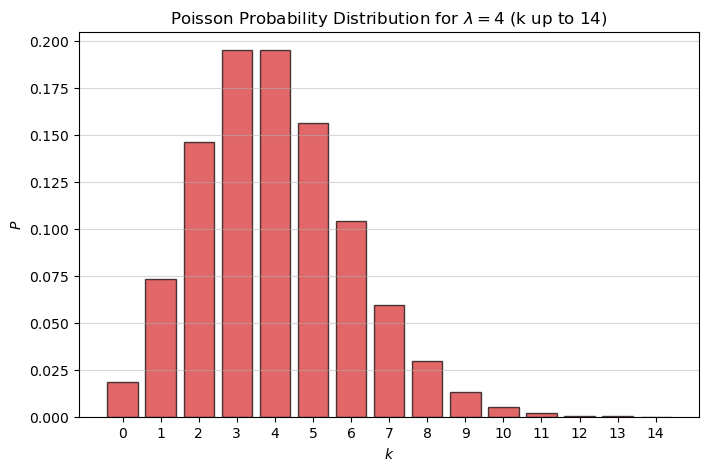

In [166]:
def plot_poisson_distribution(lam, k_range):
    import numpy as np
    import matplotlib.pyplot as plt

    def poisson_probability(lam, k):
        if lam < 0:
            raise ValueError("Lambda must be non-negative.")
        if k < 0:
            raise ValueError("k must be non-negative.")
        else:
            import numpy
            # Compute factorial of k
            fuc = 1
            for i in range(1, k+1):
                fuc *= i
            k_fuc = fuc
            return lam**k * numpy.exp(-lam) / k_fuc # Compute probability value

    # Compute probabilities from 0 to k_range
    k_values = list(range(k_range))
    probs = [poisson_probability(lam, k) for k in k_values]

    # Plot 
    plt.figure(figsize=(8, 5))
    plt.bar(k_values, probs, color='tab:red', alpha=0.7, edgecolor='black')
    plt.title(rf"Poisson Probability Distribution for $\lambda={lam}$ (k up to {k_range-1})")
    plt.xlabel(r"$k$")
    plt.ylabel(r"$P$")
    plt.xticks(ticks=k_values)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Test for lambda = 5 and k in range [0,14]
lam = 4
k_range = 15
plot_poisson_distribution(lam, k_range)


### Question 3: Calculating the Cumulative Probability

**Objective**: Write a program to calculate the cumulative probability of observing up to $n$ events for a given $\lambda$, without using any external cumulative distribution function.

**Instructions**:
1. Your program should define a function `cumulative_poisson_probability(lambda, n)` that computes the cumulative probability of observing up to $n$ events.
2. The function should sum the probabilities of observing 0 up to $n$ events, using your `poisson_probability` function from Question 1.
3. Return the cumulative probability.
4. Test your function by calculating the cumulative probability of observing up to 5 events for $\lambda = 3$.

In [154]:
def cumulative_poisson_probability(lam, n): 
    
    def poisson_probability(lam, k):
        if lam < 0:
            raise ValueError("Lambda must be non-negative.")
        if k < 0:
            raise ValueError("k must be non-negative.")
        else:
            import numpy
            # Compute factorial of k
            fuc = 1
            for i in range(1, k+1):
                fuc *= i
            k_fuc = fuc
            return lam**k * numpy.exp(-lam) / k_fuc # Compute probability value
    
    cum = 0 # Initializa valuable for cumulative probability value
    for k in range(n+1): # Iterate k over n + 1 events, summing up probabilities
        cum += poisson_probability(lam, k) 
    return cum    

# Test for lambda = 3 and n = 5
lam = 3
n = 5

print(f'Cumulative Poisson probability given λ = {lam} is P(X<={n}) =', cumulative_poisson_probability(lam, n))

Cumulative Poisson probability given λ = 3 is P(X<=5) = 0.9160820579686966


### Question 4: Generating and Analyzing Spike Trains

**Objective**: Generate spike trains using a Poisson process and analyze their properties, incorporating a refractory period and exploring neuron burstiness and correlation.

**Instructions**:

#### 4.1: Generate a Poisson Spike Train
1. Use the Poisson process generator from last week to create a spike train.
2. Set the spike rate to $r_0 = 30$ spikes per second and simulate over 60 seconds.
3. Display the resulting spike train.

#### 4.2: Add a Refractory Period
1. Modify the Poisson process generator to include a refractory period parameter, set to 1 millisecond.
2. Simulate the refractory period as follows:
   - After each spike, set the firing rate to 0.
   - Allow the firing rate to recover linearly to $r_0$ with the recovery rate:
     $$
     r(t) = r_0\frac{t-t_{spike}}{5}
     $$
     where $t_{spike}$ is the time of the last spike, and both $t$ and $t_{spike}$ are in milliseconds.
   - Ensure $r(t)$ does not exceed the initial firing rate $r_0$.
3. Plot the resulting spike train overlaid with $r(t)$.

#### 4.3: Analyze the Spike Train
1. Generate the following plots for the spike train:
   - **1.3.1**: Time interval histogram (TIH).
   - **1.3.2**: Survivor function.
   - **1.3.3**: Hazard function.

Number of spikes: 1811.0


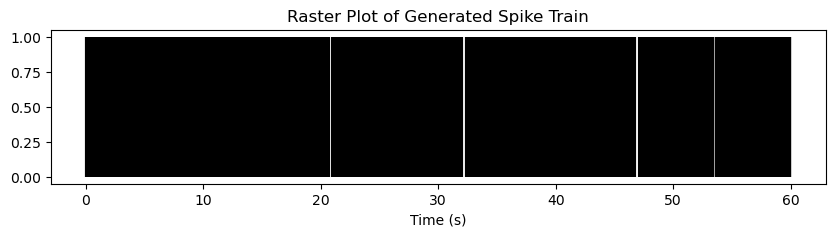

In [133]:
# 4.1

def generatePoiSpikes(r, dt, totalSize):

    import numpy as np
    
    spike_prob = r * dt # Compute spike probabilities for each bin
    
    # Generate random numbers and spikes
    random_vals = np.random.rand(totalSize)
    spikeTrain = (random_vals < spike_prob).astype(float)
    
    return spikeTrain

r = 30
dt =0.001
totalSize = 60000

spiketrain = generatePoiSpikes(r, dt, totalSize)
#print("Spike train:", spiketrain)
print("Number of spikes:", np.sum(spiketrain))

# Plot Spike Train (though with such a long time period this visualisation isn't that useful)
import numpy as np
import matplotlib.pyplot as plt

time_array = np.arange(len(spiketrain)) * dt # Create empty array of bins equal to spiketrain in lenght
spike_times = time_array[spiketrain == 1] # Create array with 1s in bins with spikes

plt.figure(figsize=(10, 2))
plt.vlines(spike_times, ymin=0, ymax=1, color='black') 
plt.xlabel('Time (s)')
plt.title('Raster Plot of Generated Spike Train')
plt.show()

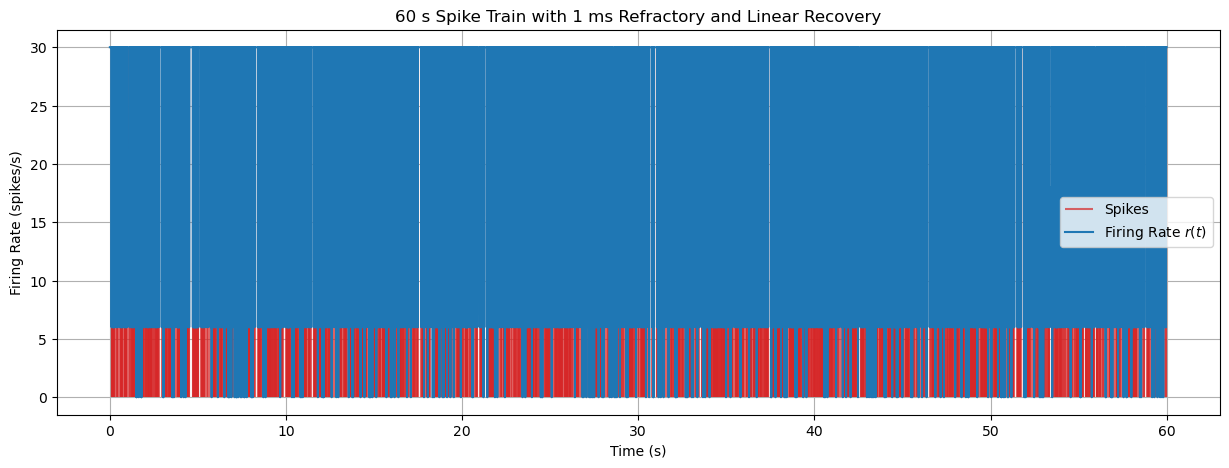

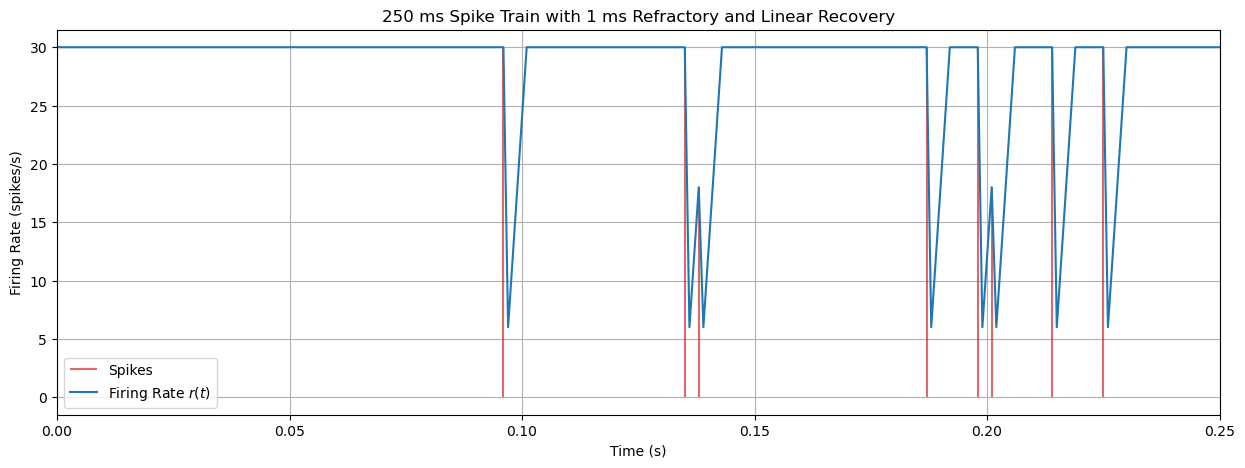

In [168]:
# 4.2

def generatePoiSpikesWithRefractory(r, dt, totalSize):
    
    import numpy as np
    
    # Initialize arrays
    spiketrain = np.zeros(totalSize, dtype=float)
    rate_array = np.zeros(totalSize, dtype=float)
    time_array = np.arange(totalSize) * dt
    time_array_ms = time_array * 1000.0  # Convert s to ms
    last_spike_time_ms = -np.inf # Time of last spike in milliseconds, initially set to negative number to stay outside spike train

    for i in range(totalSize):
        
        t_ms = time_array_ms[i] # Current timestep in ms
        delta_t = t_ms - last_spike_time_ms # How long since last spike (in ms)
  
        # Compute rates according to given formula with respect to refractory period and initial rate conditions
        if delta_t < 1:
            r_t = 0.0
        else:
            r_t = r * (delta_t / 5.0)  # linear ramp
            if r_t > r:
                r_t = r
        
        rate_array[i] = r_t        
        p_spike = r_t * dt  # Probability of spiking in current bin
        
        # Spike generator (with respect to rate in current bin)
        if np.random.rand() < p_spike:
            spiketrain[i] = 1.0
            last_spike_time_ms = t_ms  # Update last spike time

    return spiketrain, rate_array, time_array

r = 30
dt = 0.001
totalSize = 60000

spiketrain, rate_array, time_array = generatePoiSpikesWithRefractory(r, dt, totalSize)

# Polt spike train with firing rate 
import matplotlib.pyplot as plt

# Filter vaues to match spike train array
spike_times = time_array[spiketrain == 1]
spike_rates = rate_array[spiketrain == 1]

plt.figure(figsize=(15, 5))
plt.vlines(spike_times, [0], spike_rates, color='tab:red', alpha=0.7, label='Spikes') # Plot spike train
plt.plot(time_array, rate_array, label=r'Firing Rate $r(t)$', color='tab:blue') # Plot firing rate
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('60 s Spike Train with 1 ms Refractory and Linear Recovery')
plt.legend()
plt.grid(True)
plt.show()

# Due to very long time period and hight firing rate, plot isn't illustrative, thus another plot for a priod of 0.25 s

plt.figure(figsize=(15, 5))
plt.vlines(spike_times, [0], spike_rates, color='tab:red', alpha=0.7, label='Spikes')
plt.plot(time_array, rate_array, label=r'Firing Rate $r(t)$', color='tab:blue')
plt.xlim(0, 0.25)
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('250 ms Spike Train with 1 ms Refractory and Linear Recovery')
plt.legend()
plt.grid(True)
plt.show()


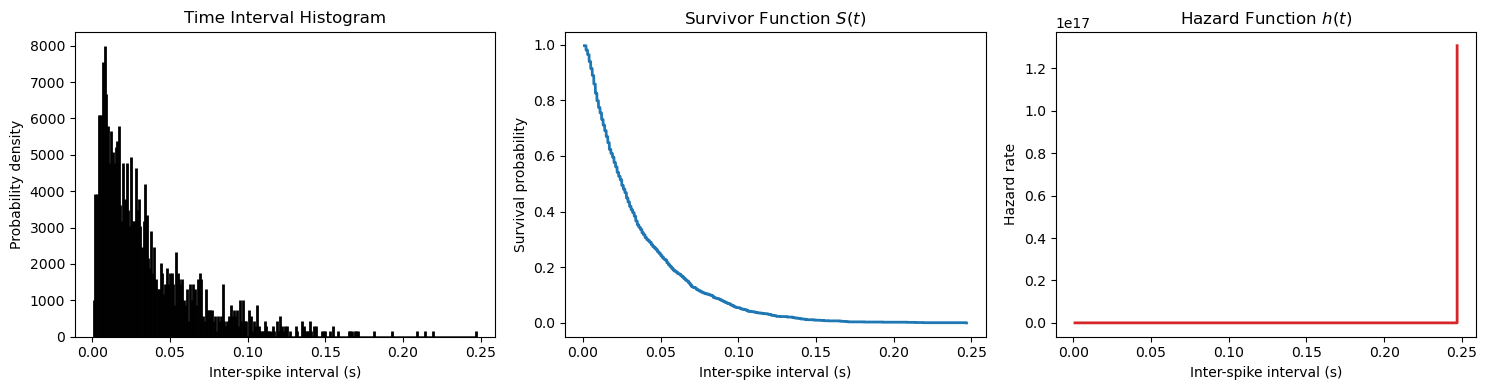

In [164]:
# 4.3

import numpy as np
import matplotlib.pyplot as plt

dt = 0.001
totalSize = 60000

# To compute and visualize TIH, Hazard and Survivor functions ISI must be computed

spike_indices = np.where(spiketrain == 1)[0] # Get the spike times
spike_times = spike_indices * dt

# Compute inter-spike intervals (ISI)
# If there are N spikes, we have N-1 intervals
if len(spike_times) < 2:
    raise ValueError("Not enough spikes to compute indices.")   # Not enough spikes

isi = np.diff(spike_times)

# Create a histogram for ISIs to estimate PDF in a bin to compute functions
hist, bin_edges = np.histogram(isi, bins=totalSize, density=True)
centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Bins centers
pdf = hist


bin_widths = np.diff(bin_edges) # Compute CDF at each bin center by integrating PDF up to that point
cdf = np.cumsum(pdf * bin_widths)

# Compute Survivor function 
S = 1 - cdf 

# Compute Hazard function
h = []
for f_val, s_val in zip(pdf, S): 
    if s_val > 0: # Avoid Survivor function = 0
        h.append(f_val / s_val)
    else:
        h.append(0.0)

# Plot TIH, Hazard and Survivor functions

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
# TIH
axes[0].bar(centers, pdf, width=centers[1]-centers[0], color='black', edgecolor='k', linewidth=2)
axes[0].set_title("Time Interval Histogram")
axes[0].set_xlabel("Inter-spike interval (s)")
axes[0].set_ylabel("Probability density")

# Survivor function
axes[1].plot(centers, S, 'tab:blue', linewidth=2)
axes[1].set_title(r"Survivor Function $S(t)$")
axes[1].set_xlabel("Inter-spike interval (s)")
axes[1].set_ylabel("Survival probability")

# Hazard function
axes[2].plot(centers, h, 'tab:red', linewidth=2)
axes[2].set_title(r"Hazard Function $h(t)$")
axes[2].set_xlabel("Inter-spike interval (s)")
axes[2].set_ylabel("Hazard rate")

plt.tight_layout()
plt.show()


### Question 5: Exploring Neuronal Burstiness and Correlation

**Objective**: Extend the spike generator to model bursty neurons and analyze correlations between oscillating neurons.

#### 5.1: Simulate Bursty Neuron Activity
1. Adapt the spike generator to model a **bursty** neuron.
2. Ensure the refractory period mechanism remains intact.
3. Plot the resulting spike train for the bursty neuron.

#### 5.2: Auto-Correlation of Spike Train
1. Refactor your homemade convolution function into a correlation function.
2. Auto-correlate the spike train with itself using this function.
3. Normalize the correlation by the amplitude of the center peak and interpret its meaning.

#### 5.3: Cross-Correlation of Two Oscillating Neurons
1. Generate two oscillating neurons by first defining their $r(t)$ and then randomizing the spike train accordingly.
2. Compute the cross-correlation of the two neurons using the correlation function.
3. Interpret the result:
   - Explain the time lag (x-axis) of the peaks.
   - Describe the amplitude (y-axis) of the peaks.

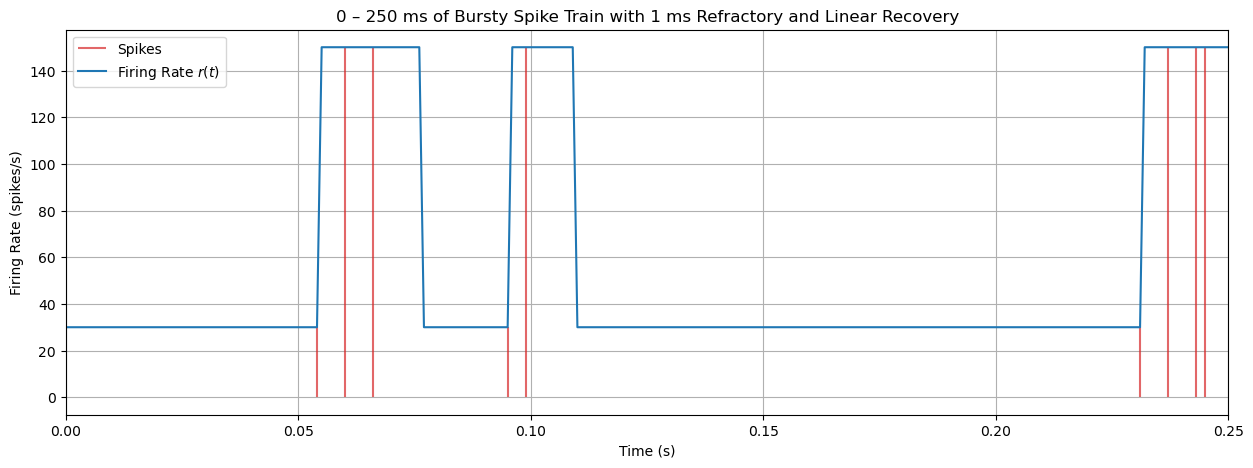

In [170]:
# 5.1

def generateBurstySpikes(r, dt, totalSize, burst_factor, burst_window):

    # Factor of r multipication for burst firing and duration of burst are added to function input parameters
    
    import numpy as np

    # Initialize arrays
    spiketrain = np.zeros(totalSize, dtype=float)
    rate_array = np.zeros(totalSize, dtype=float)
    time_array = np.arange(totalSize) * dt
    time_array_ms = time_array * 1000.0  # Convert s to ms
    last_spike_time_ms = -np.inf # Time of last spike in milliseconds, initially set to negative number to stay outside spike train

    for i in range(totalSize):
        
        t_ms = time_array_ms[i] # Current timestep in ms
        delta_t = t_ms - last_spike_time_ms # How long since last spike (in ms)
  
        # Compute rates according to given formula with respect to refractory period and initial rate conditions
        if delta_t < 1: # Inhibit firing in refractory period
            r_t = 0.0

        elif delta_t < (1 + burst_window): # Burst firing for burst_window ms with rate increased by burst_factor
            r_t = r * burst_factor 

        else: # Revert to linear ramp after burst ended
            ramp = r * (delta_t / 5.0)
            r_t = min(ramp, r)  # r shall not exceed baseline

        rate_array[i] = r_t
        p_spike = r_t * dt # Probability of a spike in current bin

        # Draw to see if a spike occurs
        if np.random.rand() < p_spike:
            spiketrain[i] = 1.0
            last_spike_time_ms = t_ms  # Update last spike time

    return spiketrain, rate_array, time_array

r = 30
dt = 0.001
totalSize = 60000
burst_factor = 5
burst_window = 10

spiketrain, rate_array, time_array = generateBurstySpikes(r, dt, totalSize, burst_factor, burst_window)

# Polt spike train with firing rate 
import matplotlib.pyplot as plt

# Filter vaues to match spike train array
spike_times = time_array[spiketrain == 1]
spike_rates = rate_array[spiketrain == 1]

plt.figure(figsize=(15, 5))
plt.vlines(spike_times, [0], spike_rates, color='tab:red', alpha=0.7, label='Spikes')
plt.plot(time_array, rate_array, label=r'Firing Rate $r(t)$', color='tab:blue')
plt.xlim(0, 0.25)
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('0 – 250 ms of Bursty Spike Train with 1 ms Refractory and Linear Recovery')
plt.legend()
plt.grid(True)
plt.show()


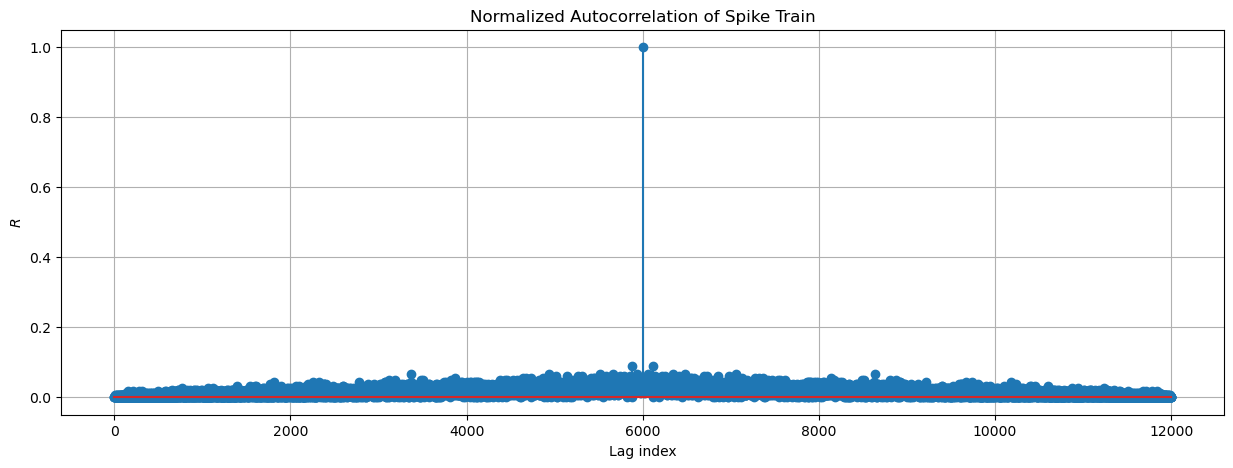

In [193]:
# 5.2

def dope_convolution_420(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1  # Length of the output matches 'full' mode
    
    y = [0] * len_y # Output array
    
    for n in range(len_y):
        for k in range(len_h):
            if 0 <= n - k < len_x:
                y[n] += x[n - k] * h[k]
    return y

'''
# Since convolution is essentailly correlation of signal x(n) with reversed signal h(n), 
# convolution function might've been refactored by reversing h(n) back

def dope_correlation_69(x, h):
    h_rev = h[::-1]
    return dope_convolution_420(x, h_rev)
'''

def dope_correlation_69(x, h):
    len_x = len(x)
    len_h = len(h)
    if len(x) != len(h):
        raise ValueError("Signals must have the same length")
    
    y = [] # Output array
    
    for n in range(- (len_x - 1), len_x): # The range of lags from -(n - 1) to (n - 1)
        sum = 0
        # For each valid index i, multiply x[i] by h[i + lag]
        for i in range(len_x):
            j = i + n
            if 0 <= j < len_x:
                sum += x[i] * h[j]
        y.append(sum)
    
    return y

def NORM_autocorrelation(x):
    
    R = dope_correlation_69(x, x) # Correlate input signal with itself
    
    # Center index for autocorrelation
    center = len(x) - 1
    
    # Step 2: Normalization
    center_value = R[center] if center < len(R) else 1  # Edge case
    if center_value != 0:
        R_norm = [val / center_value for val in R]
    else:
        R_norm = R  # Skip if no spikes
    
    return R_norm

def generatePoiSpikes(r, dt, totalSize):

    import numpy as np
    
    spike_prob = r * dt # Compute spike probabilities for each bin
    
    # Generate random numbers and spikes
    random_vals = np.random.rand(totalSize)
    spikeTrain = (random_vals < spike_prob).astype(float)
    
    return spikeTrain

r = 30
dt =0.001
totalSize = 6000

spiketrain = generatePoiSpikes(r, dt, totalSize)

R_norm = NORM_autocorrelation(spiketrain)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.stem(R_norm)
#plt.xlim(59950, 60050)
plt.xlabel('Lag index')
plt.ylabel(r'$R$')
plt.title('Normalized Autocorrelation of Spike Train')
plt.grid()
plt.show()

### 5.2.3 Results Interpretation

Lag index $n$ indicates how far one signal is shifted relative to the other in time bins.

Since we're correlating poissonian spike train with itself, correlation value $R$ is very high at lag $n=0$, because at this point signal matches itself perfectly.

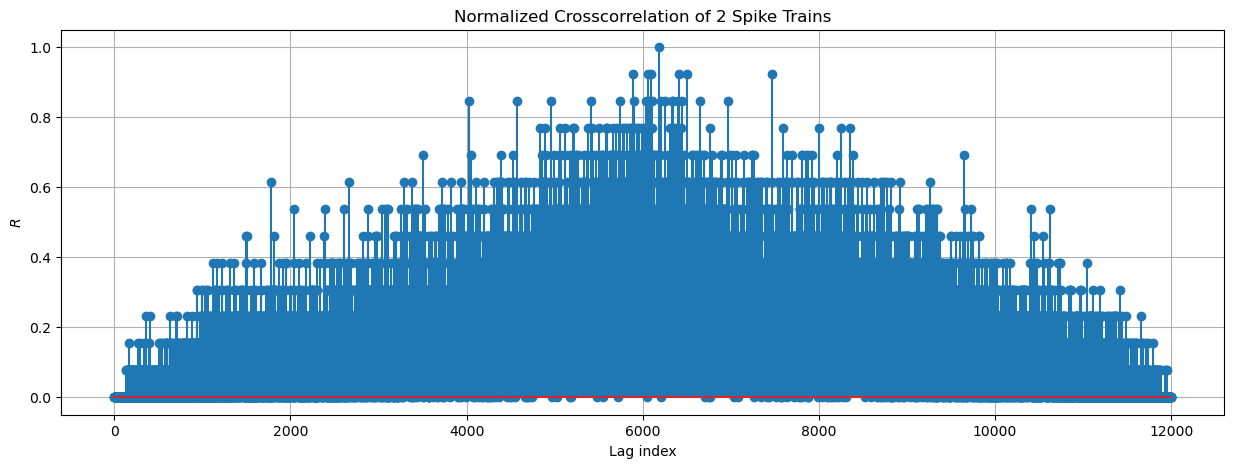

In [7]:
# 5.3

def dope_convolution_420(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1  # Length of the output matches 'full' mode
    
    y = [0] * len_y # Output array
    
    for n in range(len_y):
        for k in range(len_h):
            if 0 <= n - k < len_x:
                y[n] += x[n - k] * h[k]
    return y

def dope_correlation_69(x, h):
    len_x = len(x)
    len_h = len(h)
    if len(x) != len(h):
        raise ValueError("Signals must have the same length")
    
    y = [] # Output array
    
    for n in range(- (len_x - 1), len_x): # The range of lags from -(n - 1) to (n - 1)
        sum = 0
        # For each valid index i, multiply x[i] by h[i + lag]
        for i in range(len_x):
            j = i + n
            if 0 <= j < len_x:
                sum += x[i] * h[j]
        y.append(sum)
    
    return y
'''
def NORM_crosscorrelation(x, h):
    
    R = dope_correlation_69(x, h) # Correlate input signal with itself
    
    # Center index for autocorrelation
    center = len(x) - 1
    
    # Step 2: Normalization
    center_value = R[center] if center < len(R) else 1  # Edge case
    if center_value != 0:
        R_norm = [val / center_value for val in R]
    else:
        R_norm = R  # Skip if no spikes
    
    return R_norm
'''

def NORM_crosscorrelation(x, h):
    
    # Since crosscorrelation is likely to have a peak in center value, normalization is dome by absolute max value of R
    
    R = dope_correlation_69(x, h)
    
    peak = 1  # Find maximum absolute value
    if len(R) > 0: 
        abs_vals = []
        for val in R:
            abs_vals.append(abs(val))
        peak = max(abs_vals)

    # Normalize 
    if peak != 0: # Avoid diving by zero
        R_norm_list = []
        for val in R:
            R_norm_list.append(val / peak)
        R_norm = R_norm_list
    else:
        R_norm = R
    return R_norm
    
def generatePoiSpikes(r, dt, totalSize):

    import numpy as np
    
    spike_prob = r * dt # Compute spike probabilities for each bin
    
    # Generate random numbers and spikes
    random_vals = np.random.rand(totalSize)
    spikeTrain = (random_vals < spike_prob).astype(float)
    
    return spikeTrain

r = 30
dt =0.001
totalSize = 6000

spiketrain_1 = generatePoiSpikes(r, dt, totalSize)
spiketrain_2 = generatePoiSpikes(r, dt, totalSize)

R_norm = NORM_crosscorrelation(spiketrain_1, spiketrain_2)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.stem(R_norm)
#plt.xlim(59950, 60050)
plt.xlabel('Lag index')
plt.ylabel(r'$R$')
plt.title('Normalized Crosscorrelation of 2 Spike Trains')
plt.grid()
plt.show()



### 5.3.3 Results Interpretation

#### Time Lag
Positive lag values $n>0$ mean the second signal is shifted to the right, thus corresponding values can be interpreted as measure of extent to which spikes in the first train lead spikes in the second train. Negative lags $n<0$ does the opposite shift and opposite interpretation of dependence.

#### Amplitude

The height of the bar at each lag tells how strongly the two spike trains line up (co-occur) when one is shifted relative to the other by current lag.
After normalization by the maximum value, the peak would have value $R = 1$, so that extent to correlation varies from $0$ to $1$.

#### Conclusion

Since two different poissonian spike trains were correlated, there is no pronounced central peak and plot is horizontally symmetric, which suggests no common drive or correlation structure in signals.